In [2]:
from __future__ import print_function, division, absolute_import
import os
import GPy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.ndimage import gaussian_filter1d
from scipy import signal
import sys
sys.path.insert(0,'../..')
print(sys.path)
from mtfunc.helper import *
import safeopt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import tqdm
# plt.style.use('science')

mpl.rcParams['figure.figsize'] = (12, 4)
mpl.rcParams['axes.grid'] = True
hour=60
day=24*hour


['../..', '/Users/adrianpaeckelripoll/rbc-parameter-tuning/fig_scripts/demand_power', '/opt/anaconda3/envs/env1/lib/python39.zip', '/opt/anaconda3/envs/env1/lib/python3.9', '/opt/anaconda3/envs/env1/lib/python3.9/lib-dynload', '', '/opt/anaconda3/envs/env1/lib/python3.9/site-packages', '/opt/anaconda3/envs/env1/lib/python3.9/site-packages/IPython/extensions', '/Users/adrianpaeckelripoll/.ipython']
/Users/adrianpaeckelripoll/rbc-parameter-tuning/mtfunc   was appended to PYTHONPATH


In [43]:

# data=get_data('model_data/0_summer_data_2022_03_14_1907.csv',npy=False)
# data=pd.concat([data,get_data('model_data/50_summer_data_2022_03_14_1906.csv',npy=False)],axis=1)
# data=pd.concat([data,get_data('model_data/100_summer_data_2022_03_14_1907.csv',npy=False)],axis=1)
# data=pd.concat([data,get_data('model_data/rnd_summer_data_2022_03_14_1906.csv',npy=False)],axis=1)
# # data=pd.concat([data,get_data('model_data/mmnt_winter_data_2022_03_14_1923.csv',npy=False)['power_load']],axis=1)

data=get_data('model_data/0_winter_data_2022_03_14_1919.csv',npy=False)
data=pd.concat([data,get_data('model_data/50_winter_data_2022_03_14_1905.csv',npy=False)],axis=1)
data=pd.concat([data,get_data('model_data/100_winter_data_2022_03_14_1904.csv',npy=False)],axis=1)
data=pd.concat([data,get_data('model_data/rnd_winter_data_2022_03_14_1906.csv',npy=False)],axis=1)
data=pd.concat([data,get_data('model_data/mmnt_init_winter_data_2022_03_17_0831.csv',npy=False)],axis=1)
# data=pd.concat([data,get_data('model_data/mmnt_winter_data_2022_03_17_0841.csv',npy=False)['power_demand']],axis=1)

# data['power_load'].plot()

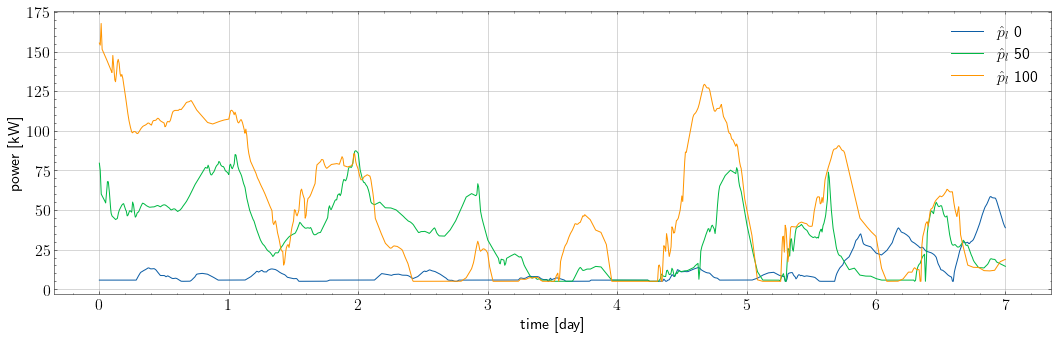

In [49]:
dt=1
di=0
T=7
dfl=di+T

# mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})
with plt.style.context('science'):
    plt.figure(figsize=(15,5))
    df=data[di*day//dt:dfl*day//dt]
#     df=data
    plt.plot(np.arange(len(df))/day*dt,df.power_demand.values[:,0],label=r'$\hat{p}_{l}$ 0')
    plt.plot(np.arange(len(df))/day*dt,df.power_demand.values[:,1],label=r'$\hat{p}_{l}$ 50')
    plt.plot(np.arange(len(df))/day*dt,df.power_demand.values[:,2],label=r'$\hat{p}_{l}$ 100')
#     plt.plot(np.arange(len(df))/day*dt,df.power_demand.values[:,3],label=r'$\hat{p}_{l}$ random')   
#     plt.plot(np.arange(len(df))/day*dt,df.power_demand.values[:,4],label=r'$\overline{p}_{l}$ measurement',color='grey')       
#     plt.plot(np.arange(len(df))/day*dt,df.power_demand.values[:,5],label=r'$\overline{p}_{l}$ measurement',color='black')       
#     plt.plot(np.arange(len(df))/day*dt,df.load_fc.values,label=r'$\hat{p}_{d}$ K-day ahead CNN ',linestyle=':')    
#     plt.plot(np.arange(len(df))/day*dt,df.demand_fc_val_k.values,label=r'$\hat{p}_{d}$ demand CNN ',linestyle=':')
    plt.ylabel('power [kW]')
    plt.xlabel('time [day]')
#     plt.xticks(np.arange(0,10,2))
#     plt.ylim([0,75])
    plt.legend(markerscale=8,loc='upper right')
    
# data[['power_demand','demand_fc','demand_fc_dev']].plot()
plt.tight_layout()

plt.savefig(f'demand_winter_inits_{T}d.pdf')
plt.show()

In [68]:
df2=get_data('0_tri1_loss_2022_03_11_0446.csv',npy=False)
df2=pd.concat([df2,get_data('50_tri1_loss_2022_03_11_0447.csv',npy=False)],axis=1)
df2=pd.concat([df2,get_data('100_tri1_loss_2022_03_11_0446.csv',npy=False)],axis=1)
df2=pd.concat([df2,get_data('rnd_tri1_loss_2022_03_11_0445.csv',npy=False)],axis=1)
# data=pd.concat([data,get_data('rnd_winter_loss_2022_03_11_0429.csv',npy=False)['power_load']],axis=1)
# df2.power_load.var(axis=1).plot()

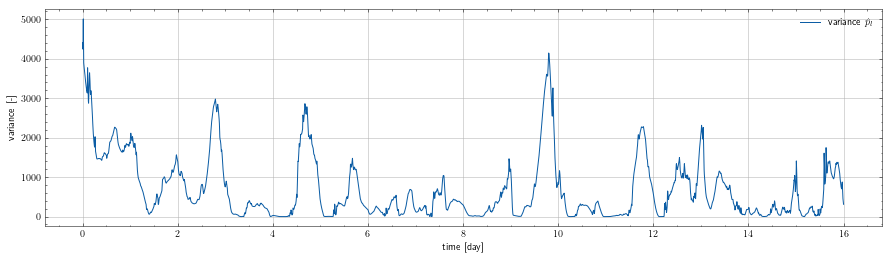

In [123]:
dt=1
di=0
T=16
dfl=di+T
mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.grid'] = True
with plt.style.context('science'):
    plt.figure(figsize=(15,4))
    df=data[di*day//dt:dfl*day//dt]
    df2=df2[di*day//dt:dfl*day//dt]
#     df=data
    plt.plot(np.arange(len(df))/day*dt,df.power_load.var(axis=1).values,label=r'variance $ \hat{p}_{l}$')
#     plt.plot(np.arange(len(df2))/day*dt,df2.power_load.var(axis=1).values,label=r'variance $ \hat{p}_{l}$')
    plt.ylabel('variance [-]')
    plt.xlabel('time [day]')
#     plt.legend(markerscale=8,loc='best')
#     plt.xticks(np.arange(0,10,2))
#     plt.ylim([0,75])
    plt.legend(markerscale=8,loc='upper right')
    
# data[['power_demand','demand_fc','demand_fc_dev']].plot()
# plt.savefig('load_summer-winter_inits_variance.pdf')
plt.show()

#  One day ahead prediction

In [3]:
train_loss_df=get_data('1_day_ahead/train_set_loss.csv',npy=False) # sim CNN at train set
valfc_loss_df=get_data('1_day_ahead/val2_set_loss.csv',npy=False) # sim CNN at val fc set
val_loss_df=get_data('1_day_ahead/val_set_loss.csv',npy=False) # sim CNN at val set (unseen both for of CNN)
valfc_ctxt_df=get_data('1_day_ahead/val_set_loss_ctxt.csv',npy=False) # ctxt CNN at val fc set
trainfc_ctxt_df=get_data('1_day_ahead/train_set_loss_ctxt.csv',npy=False) #ctxt CNN at train fc set
val_ctxt_df=get_data('1_day_ahead/val2_set_loss_ctxt.csv',npy=False) #ctxt CNN at val set (unseen both for of CNN)


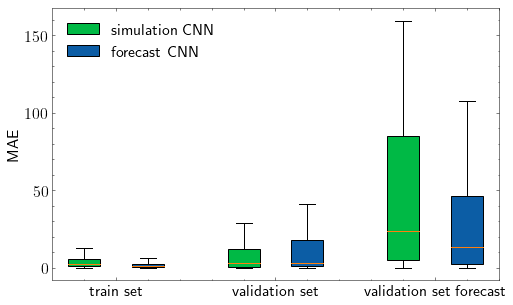

In [13]:
with plt.style.context('science'):
    plt.figure(figsize=(8,5))
    plt.rcParams.update({'font.size': 16})
    w=0.1
    bp1=plt.boxplot(train_loss_df.err.abs(),showfliers=False,positions=[0-w],widths=w,patch_artist=True,boxprops=dict(facecolor="C1"))
    bp2=plt.boxplot(trainfc_ctxt_df.err.abs(),showfliers=False,positions=[0+w],widths=w,patch_artist=True,boxprops=dict(facecolor="C0"))
    plt.boxplot(val_loss_df.err.abs(),showfliers=False,positions=[0.5-w],widths=w,patch_artist=True,boxprops=dict(facecolor="C1"))
    plt.boxplot(val_ctxt_df.err.abs(),showfliers=False,positions=[0.5+w],widths=w,patch_artist=True,boxprops=dict(facecolor="C0"))
    plt.boxplot(valfc_loss_df.err.abs(),showfliers=False,positions=[1-w],widths=w,patch_artist=True,boxprops=dict(facecolor="C1"))
    plt.boxplot(valfc_ctxt_df.err.abs(),showfliers=False,positions=[1+w],widths=w,patch_artist=True,boxprops=dict(facecolor="C0"))
    plt.xticks([0, 0.5, 1], ['train set', 'validation set', 'validation set forecast'])
    plt.ylabel(r'MAE')
    plt.grid()
    plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['simulation CNN', 'forecast CNN'], loc='upper left')
    plt.xlim([-0.2,1.2])
plt.locator_params(axis="y", nbins=5)  
plt.savefig('sim_vs_fc_MAE.pdf')

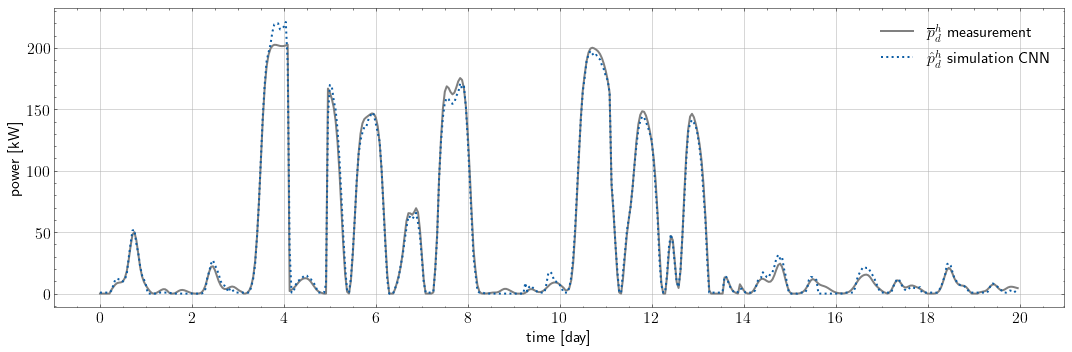

In [40]:
dt=hour
di=10
T=20
dfl=di+T

# mpl.rcParams['lines.linestyle'] = '--'
mpl.rcParams['axes.grid'] = True
with plt.style.context('science'):
    plt.figure(figsize=(15,5))
    plt.rcParams.update({'font.size': 16})
    mpl.rcParams['lines.linewidth'] = 2    
    df=train_loss_df[di*day//dt:dfl*day//dt]
#     df1=valfc_ctxt_df[di*day//dt:dfl*day//dt]
#     df=data
    plt.plot(np.arange(len(df))/day*dt,df.label,label=r'$\overline{p}_{d}^h$ measurement',color='grey')
#     plt.plot(np.arange(len(df))/day*dt,df1.prediction,':',label=r'$\hat{p}_{d}^h$ forecast CNN')     
    plt.plot(np.arange(len(df))/day*dt,df.prediction,':',label=r'$\hat{p}_{d}^h$ simulation CNN')
   
#     plt.plot(np.arange(len(df))/day*dt,df.power_demand.values[:,2],label=r'$\hat{p}_{l}$ 100')
#     plt.plot(np.arange(len(df))/day*dt,df.power_demand.values[:,3],label=r'$\hat{p}_{l}$ random')   
#     plt.plot(np.arange(len(df))/day*dt,df.power_demand.values[:,4],label=r'$\overline{p}_{l}$ measurement',color='grey')       
#     plt.plot(np.arange(len(df))/day*dt,df.power_demand.values[:,5],label=r'$\overline{p}_{l}$ measurement',color='black')       
#     plt.plot(np.arange(len(df))/day*dt,df.load_fc.values,label=r'$\hat{p}_{d}$ K-day ahead CNN ',linestyle=':')    
#     plt.plot(np.arange(len(df))/day*dt,df.demand_fc_val_k.values,label=r'$\hat{p}_{d}$ demand CNN ',linestyle=':')
    plt.ylabel('power [kW]')
    plt.xlabel('time [day]')
    plt.xticks(np.arange(0,T+1,2))
#     plt.ylim([-5,270])
    plt.legend(markerscale=20,loc='upper right')
    
# data[['power_demand','demand_fc','demand_fc_dev']].plot()
plt.tight_layout()

plt.savefig(f'demand_winter_1d_{T}d.pdf')
plt.show()